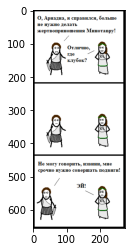

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage import io
image = io.imread('labyrinthpun.png')
plt.imshow(image);

In [2]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax
image_gray = color.rgb2gray(image) 


In [76]:
image_slic = seg.slic(image)
classes = image_slic.max()
pic_height, pic_width = image_slic.shape
s = color.label2rgb(image_slic, image, kind='avg')
all_width = []
all_height = []
sr_height = []
sr_width = []
need_classes = []
for i in range(80, 120):
    sr_height.append(i)
for i in range(38,58):
    sr_width.append(i)
obj_width = 0
width = 0
for i in range(0,classes):
    obj_height = 0
    for j in range(0,pic_height-1):
        Flag = False
        for k in range(0,pic_width-1):
            if i == image_slic[j][k]:
                obj_width +=1
                Flag = True
        if obj_width > width:
            width = obj_width
        obj_width = 0
        if Flag == True:
            obj_height += 1
    all_height.append(obj_height)
    all_width.append(width)
    obj_height = 0
    width = 0
for i in range(0,classes):
    if all_width[i] in sr_width:
        if all_height[i] in sr_height:
            need_classes.append(i)
    print(all_width[i],all_height[i]) 
for i in range(0,pic_height-1):
    for j in range(0,pic_width-1):
        if image_slic[i][j] not in need_classes:
            image_slic[i][j] = 0

275 122
69 46
67 63
51 72
47 70
68 66
67 57
69 67
69 63
90 121
44 98
42 61
57 55
70 57
68 74
85 152
57 58
193 229
46 56
58 55
126 51
59 37
53 37
58 44
70 45
46 69
48 78
54 61
52 51
50 50
62 62
62 113
52 53
52 57
86 111
32 63
44 94
49 56
50 60
66 61
52 66
140 140
59 38
58 37
63 35
55 33
135 122
57 29
57 24
65 31
54 72
66 61
59 66
65 63
65 65
80 54
63 56
85 122
126 129
149 129
58 64
44 98
64 56
69 55
49 76
51 62
54 58
64 55


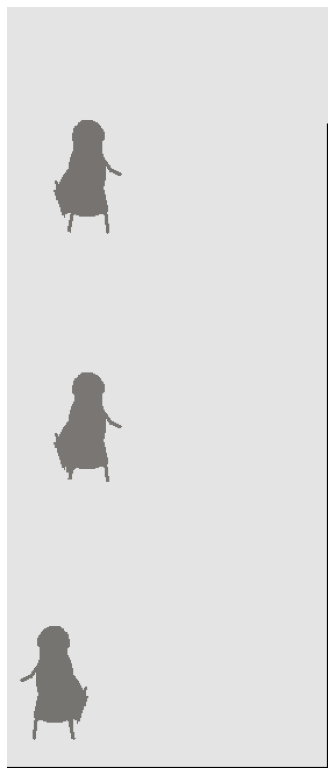

In [79]:
image_show(color.label2rgb(image_slic, image, kind='avg'));